In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../data_files/data/ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted']) # 给data设置title
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


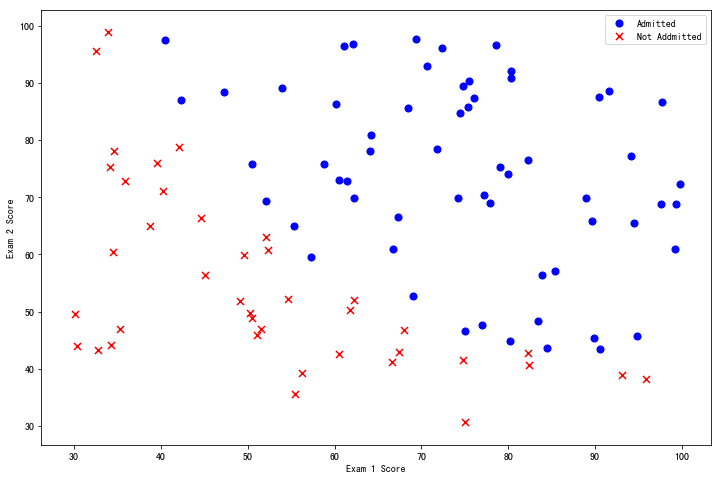

In [4]:
positive = data[data['Admitted'].isin([1])] # 1
negative = data[data['Admitted'].isin([0])] # 0

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x = positive['Exam 1'],y = positive['Exam 2'],s = 50,color = 'b',marker = 'o',label = 'Admitted')
ax.scatter(x = negative['Exam 1'],y = negative['Exam 2'],s = 50,color = 'r',marker = 'x',label = 'Not Addmitted')
plt.legend() # 显示label
ax.set_xlabel('Exam 1 Score') # set x_label
ax.set_ylabel('Exam 2 Score') # set y_label
plt.show()

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

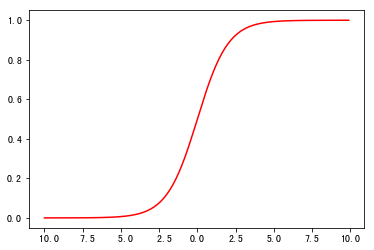

In [6]:
x1 = np.arange(-10, 10, 0.1)
plt.plot(x1, sigmoid(x1), c='r')
plt.show()

In [7]:
def cost(theta, X, y):
    first = (-y) * np.log(sigmoid(X @ theta.T))
    second = (1-y) * np.log(1 - sigmoid(X @ theta.T))
    return np.mean(first - second)

In [8]:
# add a ones column - this makes the matrix multiplication work out easier
if 'Ones' not in data.columns:
    data.insert(0,'Ones',1)
    
# set X (training data) and y (target variable)
X = data.iloc[:, :-1] # Convert the frame to its Numpy-array representation.
y = data.iloc[:,-1] # Return is NOT a Numpy-matrix, rather, a Numpy-array.

theta = np.zeros(X.shape[1])

X = np.array(X.values)
y = np.array(y.values)

In [9]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100,))

In [10]:
cost(theta, X, y)

0.6931471805599453

In [11]:
def gradient(theta, X, y):
    return (X.T @ (sigmoid(X @ theta.T) - y))/len(X)
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)

In [12]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [13]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131878,   0.20623159,   0.20147149]), 36, 0)

In [14]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='TNC', jac=gradient)
res
# help(opt.minimize) 
# res.x  # final_theta


     fun: 0.20349770158947394
     jac: array([9.04290379e-09, 9.02615302e-08, 4.84927098e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131878,   0.20623159,   0.20147149])

In [15]:
cost(result[0], X, y)

0.20349770158947394

In [16]:
def predict(theta, X):
    probability = sigmoid(X@theta)
    return [1 if x >= 0.5 else 0 for x in probability]  # return a list

In [17]:
final_theta = result[0]
predictions = predict(final_theta, X)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(X)
accuracy

0.89

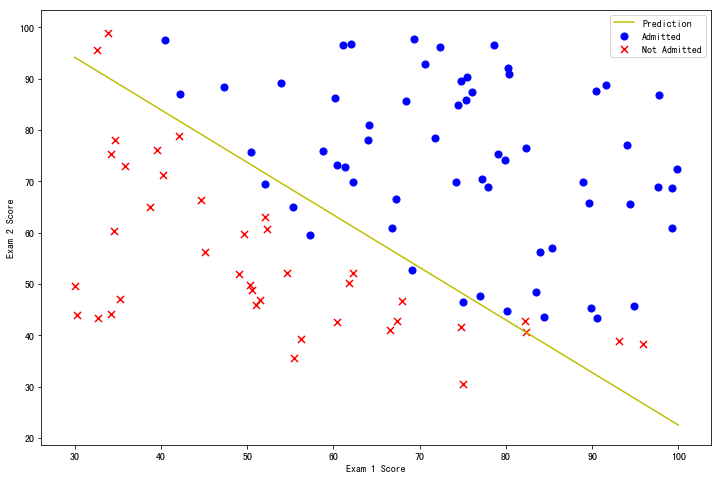

In [18]:
x1 = np.linspace(30, 100, 100)
x2 = -(final_theta[0] + x1*final_theta[1]) / final_theta[2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x1, x2, 'y', label='Prediction')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [19]:
# 实现hθ
def hfunc1(theta, X):
    return sigmoid(np.dot(theta.T, X))
hfunc1(result[0],[1,45,85])

0.7762906256930321

In [20]:
# 定义预测函数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [21]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [22]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.90      0.91        61

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100



In [23]:
x1 = np.arange(130, step=0.1)
x2 = -(final_theta[0] + x1*final_theta[1]) / final_theta[2]

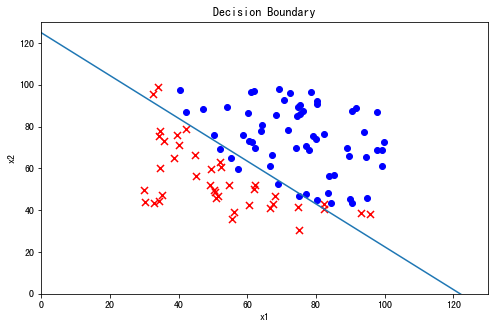

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], c='b', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x1, x2)
ax.set_xlim(0, 130)
ax.set_ylim(0, 130)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary')
plt.show()
